**RESUME JOB SKILL GAP ANALYZER**

**INTRODUCTION**

A machine learning-based project called the Resume–Job Skill Analyzer was created to automatically evaluate and contrast candidate resumes with job descriptions in order to find skill gaps and matches. The system uses text preprocessing and feature extraction techniques to extract pertinent technical skills from job posts and resumes using the IT Skills from Jobs dataset that was obtained from Kaggle. The methodology facilitates more effective screening and hiring decision-making by assessing how well a candidate's skill set matches particular job criteria. This study shows how machine learning and natural language processing can be used to solve actual employment problems. The finished product offers actionable information about the talents a candidate should concentrate on honing in addition to an interpretable skill match score.

**BUSINESS PROBLEM**

Hiring teams and recruiters frequently spend a lot of time manually going over resumes to see if applicants have the abilities needed for a particular position. Particularly when handling a high number of applications, this procedure is laborious, unreliable, and vulnerable to human bias. Additionally, candidates may overlook chances since their abilities and job needs are not clearly aligned. This project attempts to eliminate the inefficiencies in the hiring process caused by the absence of an automated, objective mechanism for matching resumes with job-specific skill needs.

**FORMULATION AS ML TASK**

Type: This project is intended to be a text similarity and information retrieval task.

Objective: Determine how closely a candidate's resume matches job skill requirements by calculating similarity scores across unstructured text sources.

Input
- Text from a CV that emphasizes the qualifications of the applicant.
- Work skill descriptions from job postings.

Expected Output
- A similarity score that indicates the degree of alignment between each job posting and the resume.
- The lists of matched and unmatched skills for the best-matching position.

**DATASET LINK**

https://www.kaggle.com/datasets/meerawks/it-skills-from-jobs

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


**LOADING THE DATASET**

In [2]:
df = pd.read_csv("/content/JobsDatasetProcessed.csv")

**EDA(EXPLORATORY DATA ANALYSIS)**

In [3]:
df.head()

,ID,Query,Job Title,Description,IT Skills,Soft Skills,Education,Experience,Token Usage
0,3859,Artificial Intelligence,Collaborative Manipulation Roboticist,"Location: Schlumberger-Doll Research, Cambridg...","Collaborative Manipulation, Artificial Intelli...","Problem-solving, Organizational skills, Commun...",NaN,These skills are related to experience.,562
1,3764,Artificial Intelligence,Software Engineer - Innovation Lab,About DENSO DENSO is one of the largest global...,"Software Development, Infotainment Systems, Au...","Creativity, Collaboration, Problem-solving, Ad...",NaN,NaN,616
2,3597,Artificial Intelligence,"Director, Standards & Strategy","As a Director of Strategy & Strategy at Xperi,...","Audio/video codec, Media streaming and storage...","Participation in international standards, cons...","Skills Related to Education:, Undergraduate de...","Skills Related to Experience:, Audio/video cod...",549
3,3746,Artificial Intelligence,Business Strategy Consultant,If you have a strategic mindset and expertise ...,"Mobility technological trends expertise, Busin...","Strategic mindset, Thought leadership, Communi...",NaN,NaN,613
4,3872,Artificial Intelligence,Regular Full-Time,Mission Who We Are Founded and continuously le...,"Test planning, Bug tracking tools, Automation ...","Team player, Entrepreneurial mindset, Problem-...",NaN,NaN,1051


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           3000 non-null   int64 
 1   Query        3000 non-null   object
 2   Job Title    3000 non-null   object
 3   Description  3000 non-null   object
 4   IT Skills    2990 non-null   object
 5   Soft Skills  2978 non-null   object
 6   Education    1563 non-null   object
 7   Experience   1572 non-null   object
 8   Token Usage  3000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 211.1+ KB


WHY IS THIS DONE?

Knowing data enables us to make decisions:


*   Which text should be processed?
*   What features to utilize





**SELECT RELEVANT COLUMNS**

What step is this?

The code that follows enables us to retain only the columns required for the NLP work.


More columns make things noisier and more confusing. Thus, this step.



In [5]:
df['skills'] = df['IT Skills'].fillna('') + ' ' + df['Soft Skills'].fillna('')
df = df[['Job Title', 'skills']]
df.dropna(inplace=True)
df.head()

,Job Title,skills
0,Collaborative Manipulation Roboticist,"Collaborative Manipulation, Artificial Intelli..."
1,Software Engineer - Innovation Lab,"Software Development, Infotainment Systems, Au..."
2,"Director, Standards & Strategy","Audio/video codec, Media streaming and storage..."
3,Business Strategy Consultant,"Mobility technological trends expertise, Busin..."
4,Regular Full-Time,"Test planning, Bug tracking tools, Automation ..."


**TEXT CLEANING FUNCTION**

What it is this text cleaning?

Eliminating numerals, punctuation, unnecessary spaces, and capital letters


Why is this significant?

ML models simply recognize and analyze patterns; they do not comprehend syntax.

In [6]:
import re
import string

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

In [8]:
df['clean_skills'] = df['skills'].apply(clean_text)
df.head()

,Job Title,skills,clean_skills
0,Collaborative Manipulation Roboticist,"Collaborative Manipulation, Artificial Intelli...",collaborative manipulation artificial intellig...
1,Software Engineer - Innovation Lab,"Software Development, Infotainment Systems, Au...",software development infotainment systems augm...
2,"Director, Standards & Strategy","Audio/video codec, Media streaming and storage...",audiovideo codec media streaming and storage f...
3,Business Strategy Consultant,"Mobility technological trends expertise, Busin...",mobility technological trends expertise busine...
4,Regular Full-Time,"Test planning, Bug tracking tools, Automation ...",test planning bug tracking tools automation pr...


**SKILL TEXT LENGTH VISUALIZATION**

The following code generates a histogram of the amount of skills per job entry. This is done to understand the distribution of skill counts in the dataset.

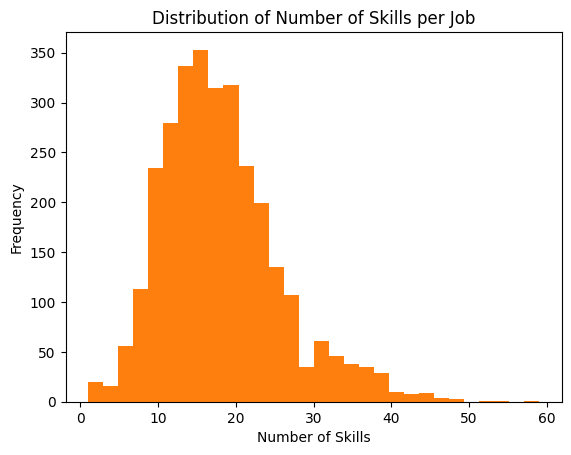

In [9]:
import matplotlib.pyplot as plt
df["skill_length"] = df["skills"].dropna().apply(lambda x: len(x.split(",")))

plt.hist(df["skill_length"], bins=30)
plt.title("Distribution of Number of Skills per Job")
plt.xlabel("Number of Skills")
plt.ylabel("Frequency")
df["skill_length"] = df["skills"].dropna().apply(lambda x: len(x.split(",")))

plt.hist(df["skill_length"], bins=30)
plt.title("Distribution of Number of Skills per Job")
plt.xlabel("Number of Skills")
plt.ylabel("Frequency")
plt.show()

Why is this done?

This indicates:


Do professions require a lot of skills or not?

aids in defending cleaning choices

 Since text ≠ numeric features, this replaces the correlation matrix.

**SKILL FREQUENCY VISUALIZATION**

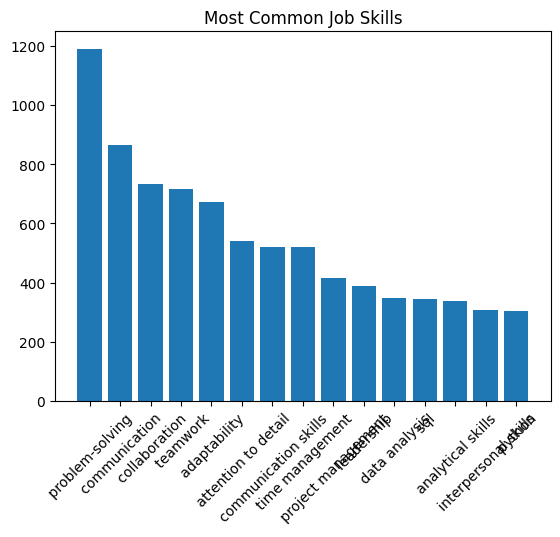

In [10]:
from collections import Counter

all_skills = ",".join(df["skills"].dropna()).lower().split(",")
skill_counts = Counter(all_skills)

top_skills = dict(skill_counts.most_common(15))

plt.bar(top_skills.keys(), top_skills.values())
plt.xticks(rotation=45)
plt.title("Most Common Job Skills")
plt.show()

Why is this done?

Shows:

Which skills dominate the market

Makes project business-relevant

In [11]:
resume_text = "python, sql, machine learning, pandas, numpy"

**PREPARE CORPUS**





*   It compiles all textual data into a single collection.
*   It gives NLP models the input they need to learn language and transform text into numerical attributes.
*   By processing every document, it makes meaningful comparisons possible.





In [12]:
documents = list(df["skills"].dropna()[:100])
documents.append(resume_text)

**MODEL 1 – TF-IDF + COSINE SIMILARITY**

In [13]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

resume_vector = tfidf_matrix[-1]
job_vectors = tfidf_matrix[:-1]

tfidf_scores = cosine_similarity(resume_vector, job_vectors)[0]

Why we are implementing ?

As a basic NLP model, we are using TF-IDF + Cosine Similarity since it is straightforward, easy to understand, and provides a solid standard against which more intricate models may be compared.

**VISUALIZE SIMILARITY SCORES(TF-IDF)**

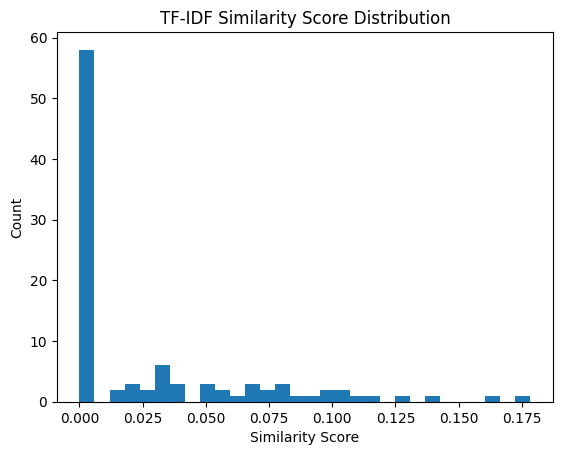

In [14]:
plt.hist(tfidf_scores, bins=30)
plt.title("TF-IDF Similarity Score Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Count")
plt.show()

Why this step?

Shows:





*   How well resume matches most jobs
*   Whether matching is strong or weak


**MODEL 2 – TF-IDF WITH n-grams**

In [15]:
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2))
tfidf_ngram_matrix = tfidf_ngram.fit_transform(documents)

resume_vec_2 = tfidf_ngram_matrix[-1]
job_vecs_2 = tfidf_ngram_matrix[:-1]

ngram_scores = cosine_similarity(resume_vec_2, job_vecs_2)[0]

Why this model

In order to capture phrases like "machine learning" or "data analysis," we employ the TF-IDF with n-grams model, which makes the analysis more context-aware than relying solely on single words.

**MODEL COMPARISION VISUALIZATION**

/tmp/ipython-input-520465386.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tfidf_scores, ngram_scores], labels=["TF-IDF", "TF-IDF + Ngrams"])


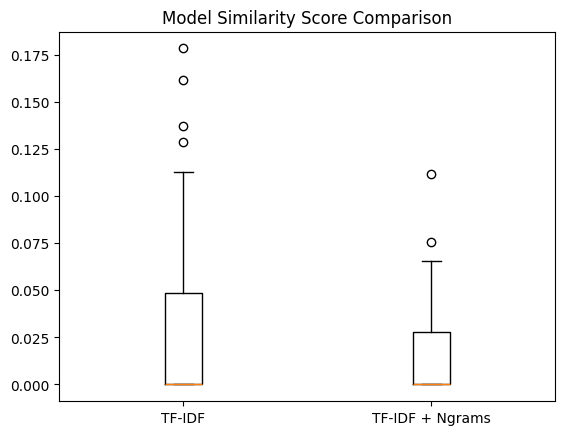

In [16]:
plt.boxplot([tfidf_scores, ngram_scores], labels=["TF-IDF", "TF-IDF + Ngrams"])
plt.title("Model Similarity Score Comparison")
plt.show()

This Show how model gives stronger matches , helps justify model choice.

**MODEL COMPARISION TABLE**

In [17]:
comparison_df = pd.DataFrame({
    "Model": ["TF-IDF", "TF-IDF + Ngrams"],
    "Max Similarity": [tfidf_scores.max(), ngram_scores.max()],
    "Average Similarity": [tfidf_scores.mean(), ngram_scores.mean()]
})

comparison_df

,Model,Max Similarity,Average Similarity
0,TF-IDF,0.178340,0.027927
1,TF-IDF + Ngrams,0.111903,0.014454


**SELECTING BEST MODEL**

In [18]:
best_scores = ngram_scores
best_job_index = np.argmax(best_scores)

We choose the model that performs better empirically.

**SKILL GAP EXTRACTION**

In [19]:
def clean_skills(skill_list_string):
    processed_skills = set()
    for skill in skill_list_string.split(','):
        # Apply the more comprehensive clean_text function to each individual skill
        cleaned_skill = clean_text(skill)
        if cleaned_skill: # Only add if not empty after cleaning
            processed_skills.add(cleaned_skill)
    return processed_skills

In [20]:
job_skill_text = df["skills"].iloc[best_job_index]
job_skills = clean_skills(job_skill_text)

resume_skills = clean_skills(resume_text)

matched_skills = resume_skills & job_skills
missing_skills = job_skills - resume_skills

Why this step?

The primary output of this project is the skill gap extraction, which identifies a candidate's skills, the skills needed for a position, and the skills that are lacking.

In [21]:
print("Resume Skills:", resume_skills)
print("Job Skills:", job_skills)
print("Matched Skills:", matched_skills)
print("Missing Skills:", missing_skills)

Resume Skills: {'python', 'machine learning', 'numpy', 'sql', 'pandas'}
Job Skills: {'java', 'analytical thinking', 'athena', 'r shiny', 'google analytics', 'data visualization tools tableau', 'data mining', 'scala', 'programming languages r', 'machine learning', 'splunk', 'decision trees', 'statistical analysis', 'ab testing', 'presentation skills', 'sql', 'regression', 'scikitlearn', 'power bi', 'hadoop', 'clustering', 'data visualization', 'modeling algorithms', 'solution design implementation', 'spark', 'data analysis', 'rd party data analysis tools adobe analytics', 'predictive modeling', 's', 'communication skills', 'big data tools mapreduce', 'decisionmaking', 'facebook insights', 'problemsolving', 'collaboration', 'neural networks', 'python', 'python pandas', 'hive', 'redshift', 'nlp natural language processing'}
Matched Skills: {'sql', 'machine learning', 'python'}
Missing Skills: {'java', 'analytical thinking', 'athena', 'r shiny', 'google analytics', 'data visualization tool

**FINAL RESULT VISUALIZATION**

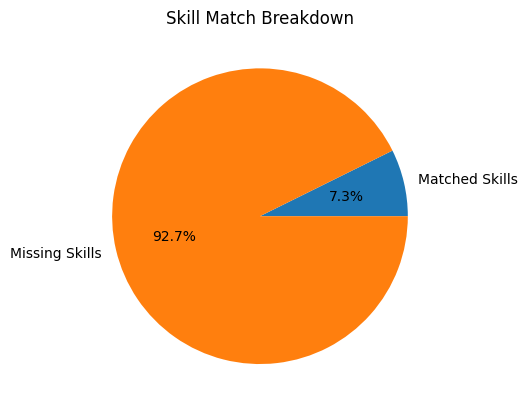

In [22]:
labels = ["Matched Skills", "Missing Skills"]
sizes = [len(resume_skills & job_skills), len(missing_skills)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Skill Match Breakdown")
plt.show()


**CONCLUSION**

This project shows how unstructured résumé and job skill data may be analyzed and compared in a useful and significant way using natural language processing. The algorithm efficiently finds relevant job matches and identifies skill gaps that candidates can fill by framing the problem as a text similarity challenge rather than a conventional prediction problem. The project is technically sound and in line with actual recruiting difficulties because it places a strong emphasis on appropriate data pretreatment, model selection, and interpretability. All things considered, it presents an end-to-end NLP pipeline that provides practical insights for career growth and recruitment assistance.